# Problem 1.3: Voltage Peaks - data reader

The following is a small program to read the data file "data_VoltagePeaks.txt", which contains a single column: Voltage.

### Author & Date: 
- Troels C. Petersen (Niels Bohr Institute)
- 07-11-2021

***

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the data and print it to check it:
voltage = np.loadtxt("data_VoltagePeaks.txt")

print("Number of entries: ", len(voltage))
for i in range(10) : 
    print(f"  {voltage[i]:14.6f}")

Number of entries:  1000000
        1.119280
        1.828920
        0.797830
        2.715827
        1.496780
       12.176045
       24.154821
        1.981145
        0.677696
        0.604801


In [3]:
print(np.max(voltage))
print(np.average(voltage))
print(np.min(voltage))

1927359.118242
16.793095823228004
-0.039321


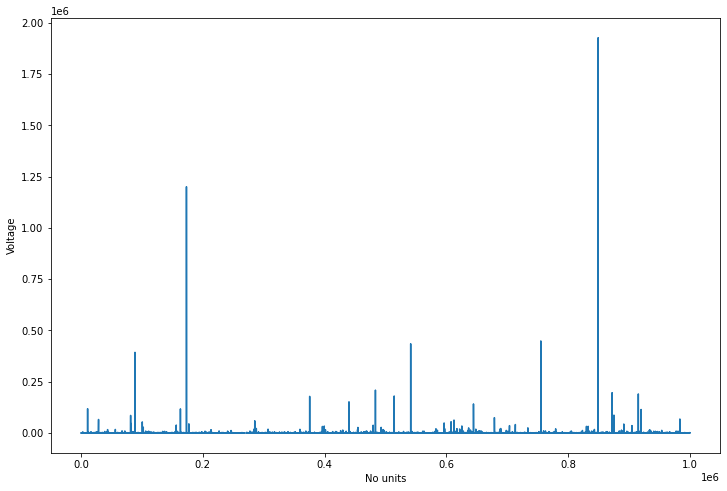

In [4]:
x_axis = np.arange(len(voltage))

fig, ax = plt.subplots(figsize=[12,8])
ax.plot(x_axis,voltage)
ax.set_xlabel('No units')
ax.set_ylabel('Voltage')
#plt.yscale('log')
plt.show()

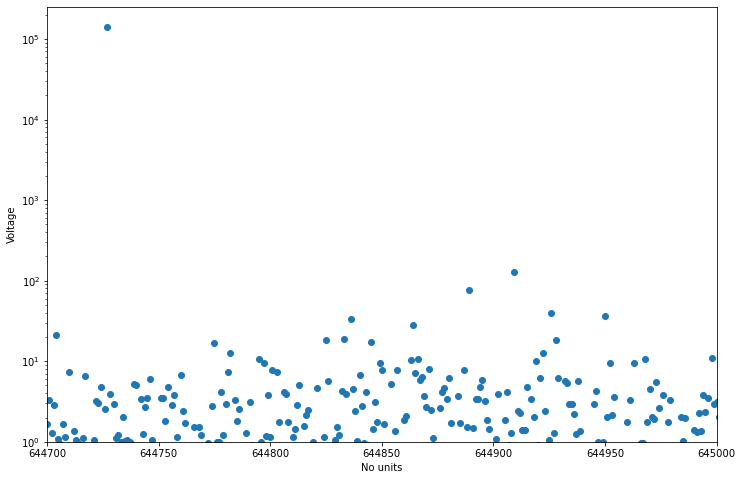

In [5]:
# Zoom in on some of the peaks

fig, ax = plt.subplots(figsize=[12,8])
ax.scatter(x_axis,voltage)
ax.set_xlabel('No units')
ax.set_ylabel('Voltage')
#ax.set_xlim([0.84958e6,0.8496e6]) # Biggest peak
#ax.set_xlim([0.1732e6,0.17325e6]) # Second biggest peak
ax.set_xlim([0.6447e6,0.645e6]) # Condensed noise?
ax.set_ylim([1,0.25e6])
plt.yscale('log')
plt.show()

The biggest peaks consist of only 1 data point?!

In [6]:
from scipy.signal import find_peaks

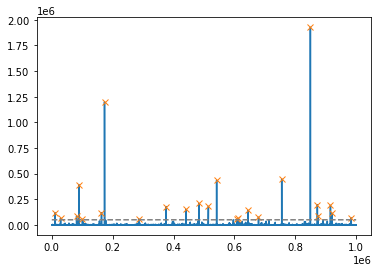

In [7]:
height = 5e4
peaks, _ = find_peaks(voltage, height=height)
plt.plot(x_axis,voltage)
plt.plot(x_axis[peaks], voltage[peaks], "x")
plt.plot(np.full(len(voltage),height), "--", color="gray")
plt.show()

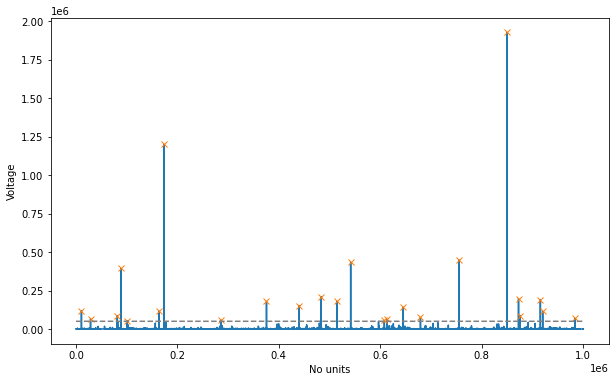

In [8]:
# Making a final, 'fancy' plot
x_axis = np.arange(len(voltage))
height = 5e4
peaks, _ = find_peaks(voltage, height=height)

fig, ax = plt.subplots(figsize=[10,6])
ax.plot(x_axis,voltage)
ax.plot(x_axis[peaks], voltage[peaks], "x")
ax.plot(np.full(len(voltage),height), "--", color="gray")
ax.set_xlabel('No units')
ax.set_ylabel('Voltage')
#plt.yscale('log')
#plt.show()
plt.savefig('Problem_1.3.png',dpi=600)